<a href="https://colab.research.google.com/github/kornelkilian/BEVADAT2022232/blob/main/ZH/bevadat_mintazh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd

1.1 Olvassuk be az iris.csv fájlt egy dataframebe

In [19]:
df=pd.read_csv('iris.csv')

1.2 Módosítsuk a datafrem oszlopainak nevét, pont helyett alahuzas

In [20]:
df.columns=df.columns.str.replace('.','_')

<ipython-input-20-b4b11f39524b>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns=df.columns.str.replace('.','_')


1.3 Dobjuk el a NaN sorokat

In [21]:
df=df.dropna()

1.4 Irrasuk ki a variety oszlop kulonbozo ertekeit

In [23]:
print(df['variety'].unique())


['Setosa' 'Versicolor' 'Virginica']


1.5 Vizsgáljuk meg, milyen korreláció van a DataFrame oszlopai között:

In [25]:
correlation = df.corr()
max_correlation = correlation.unstack().sort_values(ascending=False).drop_duplicates().head(1)
print(max_correlation)


sepal_length  sepal_length    1.0
dtype: float64


<ipython-input-25-77bc17ae424f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


1.6 Módosítsuk a 'variety' oszlop értékeit számokra:

In [26]:
df['variety']=df['variety'].map({'Setosa':0,'Versicolor': 1,'Virginica':2})

1.8 Dobjuk el a sepal width oszlopot

In [27]:
df=df.drop('sepal_width',axis=1)

Jelenítsük meg egy kördiagramon a 'variety' oszlop eloszlását

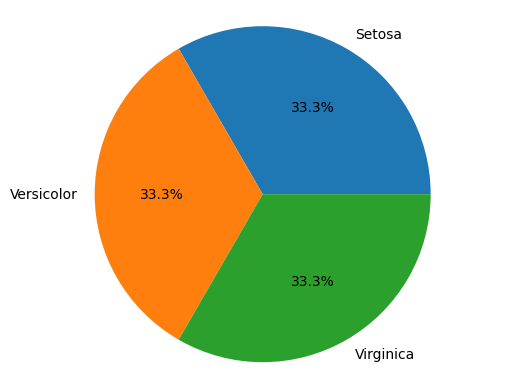

In [28]:
import matplotlib.pyplot as plt

variety_counts=df['variety'].value_counts()
labels=['Setosa','Versicolor','Virginica']

plt.pie(variety_counts,labels=labels,autopct='%1.1f%%')
plt.axis('equal')
plt.show()

1.9 Jelenítsük meg a 'petal_length' és 'petal_width' oszlopokat egy scatter plot-on, különböző színekkel az osztályok szerint:

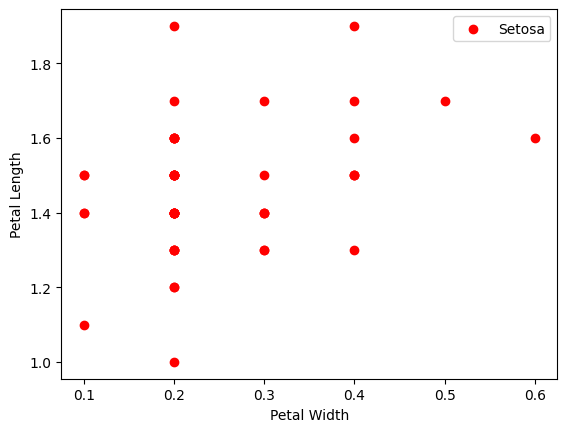

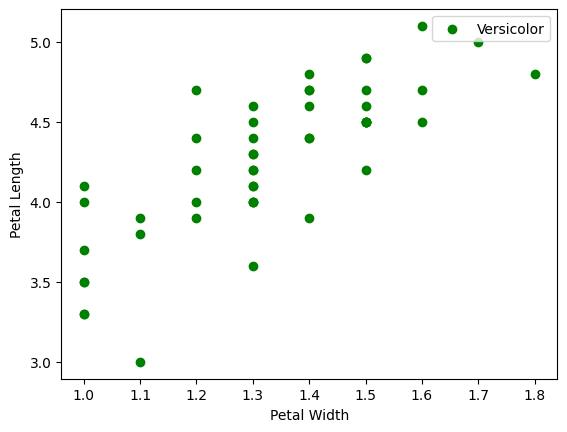

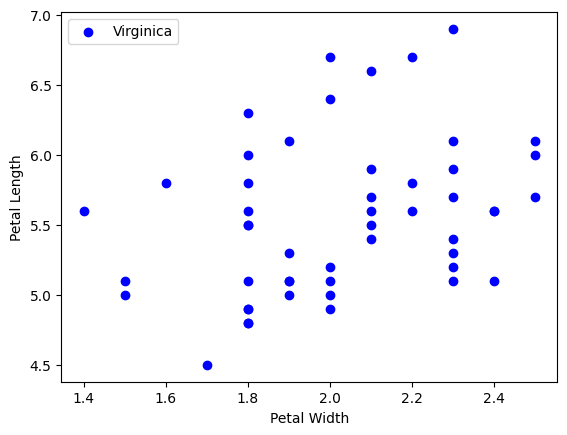

In [29]:
colors=['red','green','blue']
variety_names=['Setosa','Versicolor','Virginica']

for i, variety in enumerate(variety_names):
  variety_data=df[df['variety']==i]
  plt.scatter(variety_data['petal_width'],variety_data['petal_length'],color=colors[i],label=variety)

  plt.xlabel('Petal Width')
  plt.ylabel('Petal Length')
  plt.legend()
  plt.show()

## 2. feladat
2.1 A 'variety' legyen a cél függvény, a maradék oszlopok pedig a tanító halmaz  
2.2 Spliteld szét a dataframe-t. A tanító adathalmaz legyen 70%, a test pedig 30%. A random state pedig legyen 42  

(sklearn)


In [30]:
import numpy as np
from sklearn.model_selection import train_test_split

X=df.drop('variety',axis=1)
y=df['variety']

2.2 Válasszuk szét a DataFrame-t a tanító és a teszt adathalmazra 70-30 arányban, a random_state értékét pedig állítsuk 42-re:

In [31]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

3.1 Képezzünk egy döntési fát a tanító adathalmazon:

In [32]:
from sklearn.tree import DecisionTreeClassifier

clf=DecisionTreeClassifier()

clf.fit(X_train,y_train)

DecisionTreeClassifier()

3.2 Írassuk ki a modell pontosságát a teszt adathalmazon:



In [33]:
accuracy=clf.score(X_test,y_test)
print(accuracy)

1.0


3.3 Jelenítsük meg a döntési fát a matplotlib segítségével:



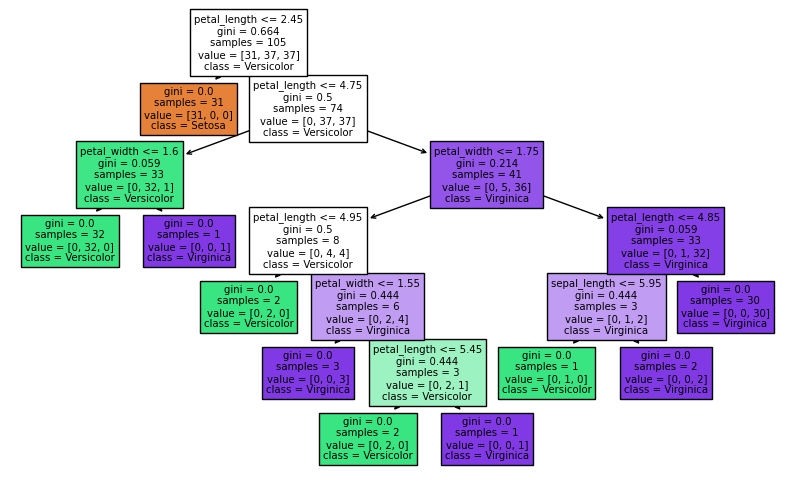

In [35]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
tree.plot_tree(clf, feature_names=X.columns, class_names=['Setosa', 'Versicolor', 'Virginica'], filled=True)
plt.show()
